<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/Diabetics_-Data_-Cleaning/Diabetes_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the file

In [1]:
import pandas as pd
from google.colab import files
uploaded_file = files.upload()
filename = next(iter(uploaded_file)) # dynamically uploading

Saving data_diabetics.csv to data_diabetics (1).csv


In [3]:
df=pd.read_csv(filename)
df.head()

,Disease Category,Drug Category,Drug Name,Dosage,Retail Price,Purchase Price,Sales,Date
0,Diabetics,ALPHA GLUCO,DIABOSE 50MG,50MG,2020603.2,1737412.6,3427.0,2.24
1,Diabetics,ALPHA GLUCO,GLUCOBAY 100MG,100MG,954.0,1514.0,1.0,2.24
2,Diabetics,ALPHA GLUCO,GLUCOBAY 100MG,100MG,421702.5,360710.5,753.0,2.24
3,Diabetics,ALPHA GLUCO,GLUCOBAY 50MG,50MG,187.6,327.6,41.5,2.24
4,Diabetics,ALPHA GLUCO,GLUCOBAY 50MG,50MG,13511.0,21434.4,52.0,2.24


# Removing Noisy Sales Records

In [5]:
df_cleaned = df[df['Sales'] > 10]  # Keeps only rows with Sales > 10
print("Cleaned dataset size:", df_cleaned.shape)

Cleaned dataset size: (2878, 8)


# Winsorization for Outlier Handling

In [10]:
# create a function for capping
def cap_values(column):
    lower_cap = column.quantile(0.05)
    upper_cap = column.quantile(0.95)
    return column.clip(lower=lower_cap, upper=upper_cap)

In [16]:
# Apply capping to Purchase Price, Retail Price, and Sales
df_cleaned.loc[:, 'Purchase Price'] = cap_values(df_cleaned['Purchase Price'])
df_cleaned.loc[:, 'Retail Price'] = cap_values(df_cleaned['Retail Price'])
df_cleaned.loc[:, 'Sales'] = cap_values(df_cleaned['Sales'])

In [17]:
import matplotlib.pyplot as plt
def plot_outliers(df, feature, title):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[feature], flierprops=dict(markerfacecolor='r', marker='o', markersize=5))  # Highlight outliers
    plt.title(title)
    plt.show()

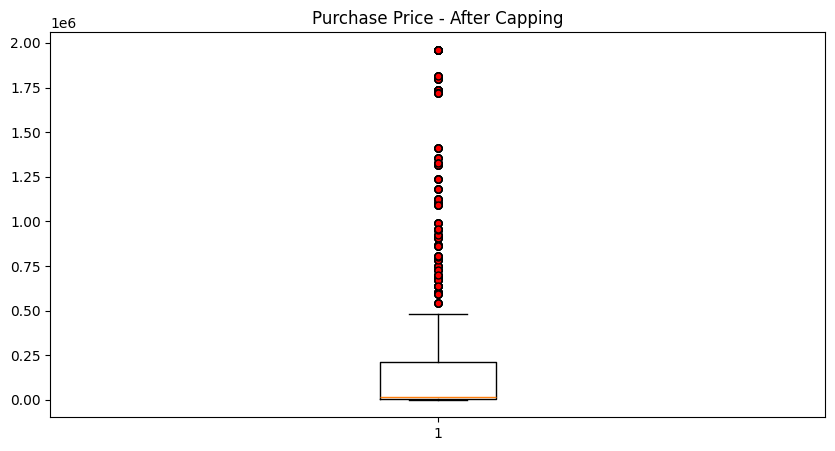

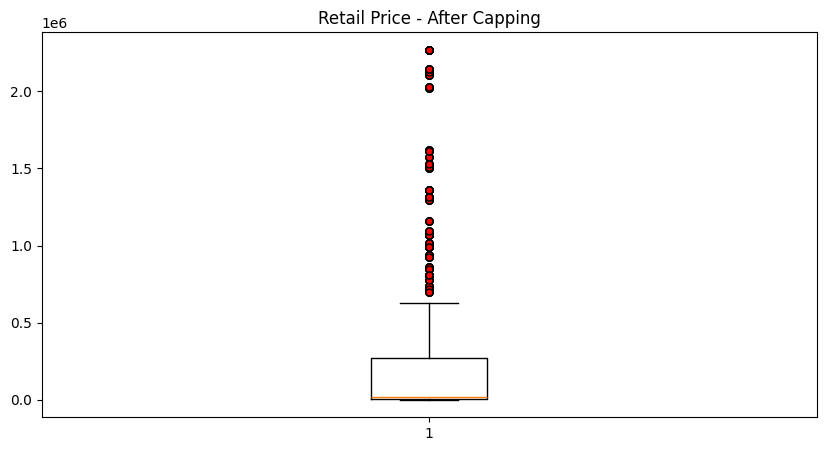

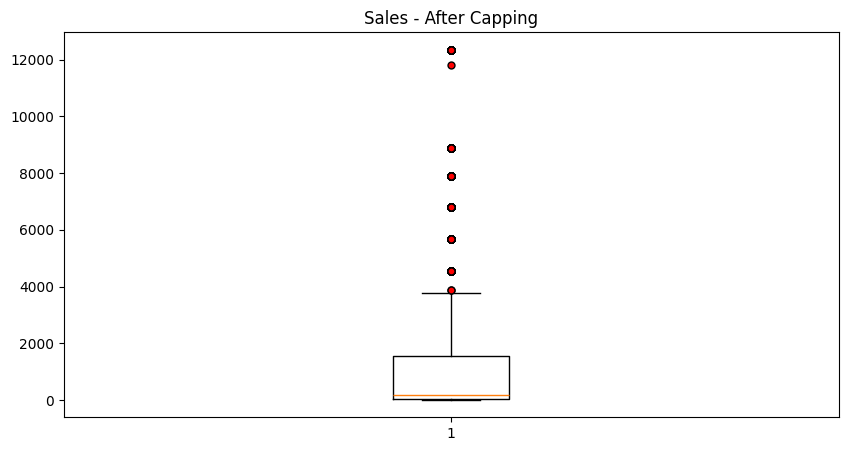

In [18]:
# Plot Purchase Price, Retail Price, and Sales after capping
plot_outliers(df_cleaned, 'Purchase Price', 'Purchase Price - After Capping')
plot_outliers(df_cleaned, 'Retail Price', 'Retail Price - After Capping')
plot_outliers(df_cleaned, 'Sales', 'Sales - After Capping')

#Downloading the Updated Dataset

In [20]:
df_cleaned.to_csv('cleaned_diabetics.csv', index=False)

# Step 7: Download the cleaned dataset (optional)
from google.colab import files
files.download('cleaned_diabetics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>